In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("../data/external/data.csv")

In [7]:
df.rename(columns={'Unnamed: 0':'Serial_Number'},inplace=True)

In [8]:
# checking fir the dtypes
df.dtypes

Serial_Number     int64
age               int64
job              object
marital          object
education        object
default          object
balance           int64
housing          object
loan             object
contact          object
day_of_week       int64
month            object
duration          int64
campaign          int64
pdays             int64
previous          int64
poutcome         object
y                object
dtype: object

In [9]:
conc = []
conc.append('Datatypes are valid')

In [10]:
df.duplicated().sum()
conc.append('There is no duplicate values present in this dataset')

In [11]:
conc.append('Data Contains High Number of Null Values')

In [12]:
nll = df.isnull().mean()[df.isnull().mean() * 100 != 0].sort_values(ascending=False)*100

In [13]:
# seperating num and cat values

In [14]:
num = df.select_dtypes(exclude='object')
cat = df.select_dtypes(include='object')

In [15]:
# class Imbalance

<Axes: xlabel='y'>

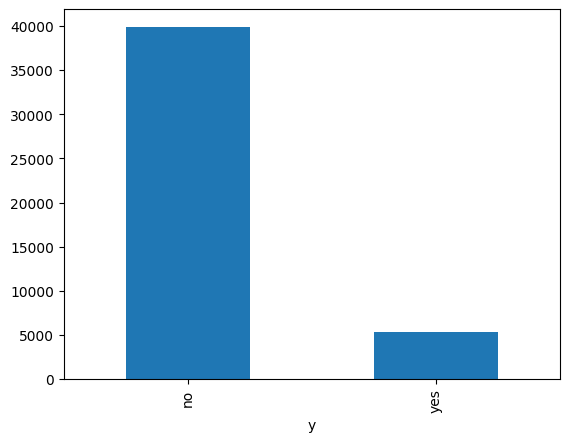

In [16]:
df['y'].value_counts().plot(kind='bar')

In [17]:
conc.append('Data is Highly Imbalanced !!')

<Axes: ylabel='count'>

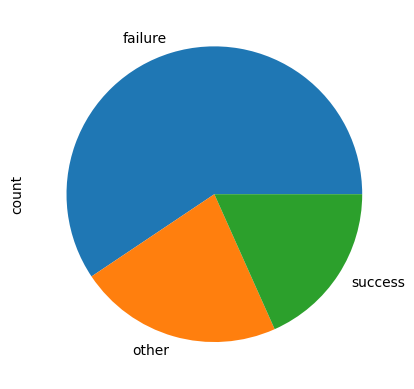

In [18]:
df[nll.index.values]['poutcome'].value_counts().plot(kind='pie')

In [19]:
# Constant Strategy
df[df['poutcome'] == 'other']['poutcome'].count()

np.int64(1840)

<Axes: xlabel='poutcome'>

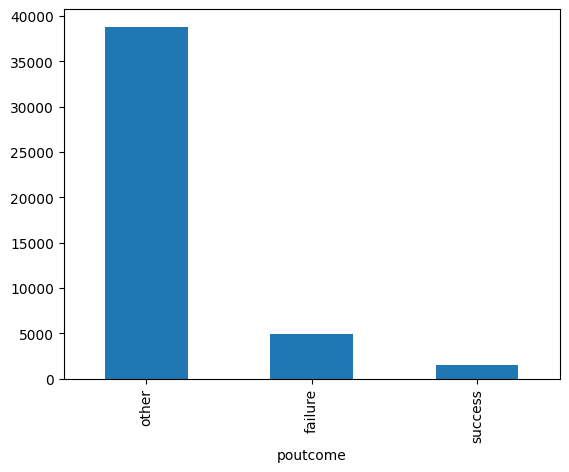

In [20]:
df['poutcome'].fillna('other').value_counts().plot(kind='bar')

In [21]:
df.fillna({'poutcome':'Not Availaible'},inplace=True)

<Axes: ylabel='count'>

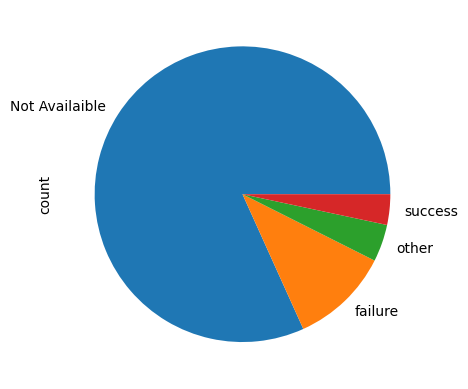

In [22]:
df['poutcome'].value_counts().plot(kind='pie')

In [23]:
conc.append('Poutcome column null values has been handled but class imabalnce has been arised in the data.')

In [24]:
df

,Serial_Number,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,Not Availaible,no
1,1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,Not Availaible,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,Not Availaible,no
3,3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,Not Availaible,no
4,4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,Not Availaible,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,Not Availaible,yes
45207,45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,Not Availaible,yes
45208,45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,Not Availaible,no


In [25]:
nll_columns = nll.index.values

In [26]:
df.fillna({'contact':df[nll_columns]['contact'].mode()[0]},inplace=True)

In [27]:
df[nll_columns]['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
Name: count, dtype: int64

In [28]:
# Checking if there is any relationship between education column and target

In [29]:
pd.crosstab(df['y'],df['education'],normalize='index')*100

education,primary,secondary,tertiary
y,,,
no,16.337396,54.158729,29.503876
yes,11.733175,48.640064,39.626762


In [30]:
df.fillna({'education':'tertiary'},inplace=True)

In [31]:
df.fillna({'job':df['job'].mode()[0]},inplace=True)

In [32]:
conc.append('NUll values has been handled but there is a class imbalance issue that still needs to be addreseed')

In [33]:
# handling imbalance in dataset

In [34]:
# updated values 
num = df.select_dtypes(exclude="object")
cat = df.select_dtypes(include="object")

In [35]:
import sklearn
X = df.drop(columns="y")
y = df["y"]

In [36]:
from imblearn.under_sampling import RandomUnderSampler
rs = RandomUnderSampler(sampling_strategy='not minority')
data = rs.fit_resample(X, y)
data[0]["poutcome"].value_counts()

poutcome
Not Availaible    7808
failure           1210
success           1045
other              515
Name: count, dtype: int64

In [37]:

# implementing random undersampling

In [38]:
# data[0]['loan'].value_counts().plot(kind='barh')

In [39]:
conc

['Datatypes are valid',
 'There is no duplicate values present in this dataset',
 'Data Contains High Number of Null Values',
 'Data is Highly Imbalanced !!',
 'Poutcome column null values has been handled but class imabalnce has been arised in the data.',
 'NUll values has been handled but there is a class imbalance issue that still needs to be addreseed']

<Axes: >

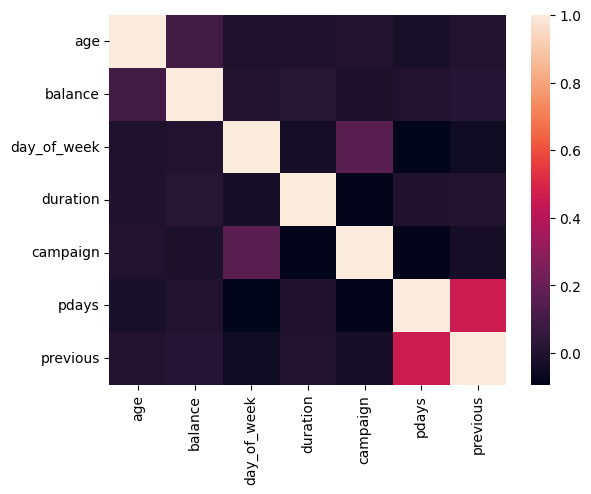

In [49]:
# covariance matrix
# correlationmatrix
sns.heatmap(num.drop(columns='Serial_Number').corr())

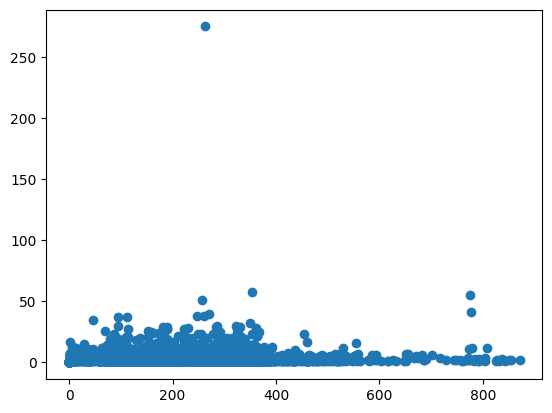

In [60]:
# num[['age','previous']].plot(x='age',y='previous',kind='scatter')
plt.scatter(x=num['pdays'],y=num['previous'])
plt.show()

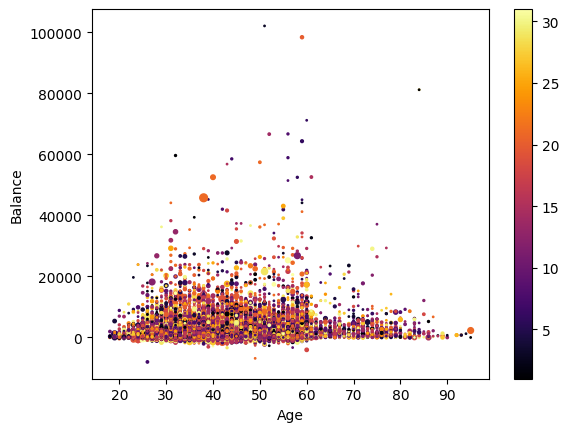

In [93]:
plt.scatter(
    x=num["age"], y=num["balance"], s=num["campaign"], c=num["day_of_week"], cmap="inferno"
)
plt.xlabel('Age')
plt.ylabel('Balance')
plt.colorbar()
# plt.annotate(text='hey',xy=num['age'])
# plt.text()
plt.show()

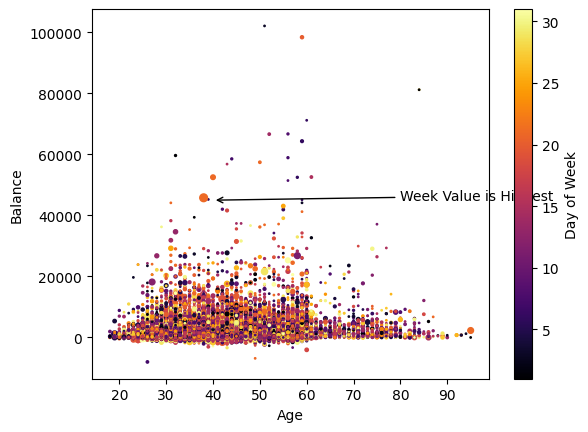

In [104]:
# numimport matplotlib.pyplot as plt

# Assuming 'num' is a DataFrame with the relevant columns
plt.scatter(
    x=num["age"], y=num["balance"], s=num["campaign"], c=num["day_of_week"], cmap="inferno"
)
plt.xlabel('Age')
plt.ylabel('Balance')
plt.colorbar(label="Day of Week")  # Add a label to the colorbar

# Add annotation at a specific point (e.g., the first value of 'age' and 'balance')
plt.annotate(
    text='Week Value is Highest', 
    xy=(40, 45000),  # Example: First data point
    xytext=(40 + 40, 45000),  # Offset position
    arrowprops=dict(arrowstyle="->", color='black')  # Arrow pointing to the annotated point
)

plt.show()


In [114]:
# cat['job'].value_counts().plot(kind='bar')
# # plt.annotate(
# #     text="Week Value is Highest",
# #     xy=('m, 20000),  # Example: First data point
# #     xytext=(40 + 40, 45000),  # Offset position
# #     arrowprops=dict(arrowstyle="->", color="black"),  # Arrow pointing to the annotated point
# # )

# # plt.xticks()
# # plt.ylim(6000)

In [115]:
conc.append('There is no high obvious corelation between values, linear models will struggle to perform !!')

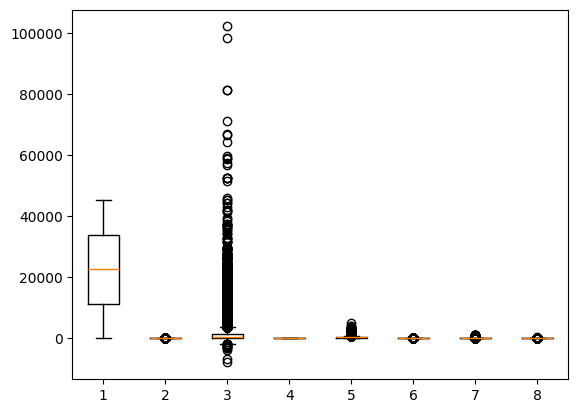

In [119]:
plt.boxplot(num)
plt.show()

In [121]:
conc.append('Data has high outliers, linear models will not be able to perform !!')

<Axes: >

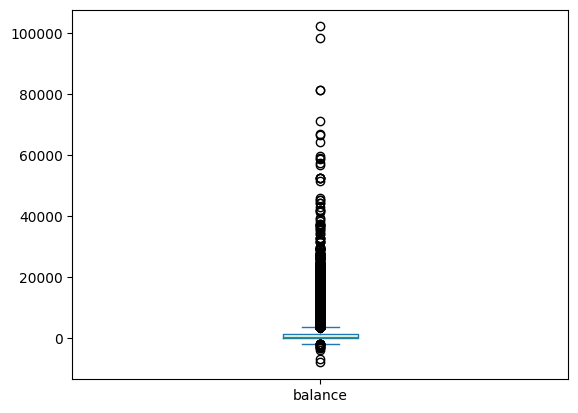

In [125]:
num['balance'].plot(kind='box')

In [126]:
# outlier -> trim
# capping

<Axes: ylabel='Density'>

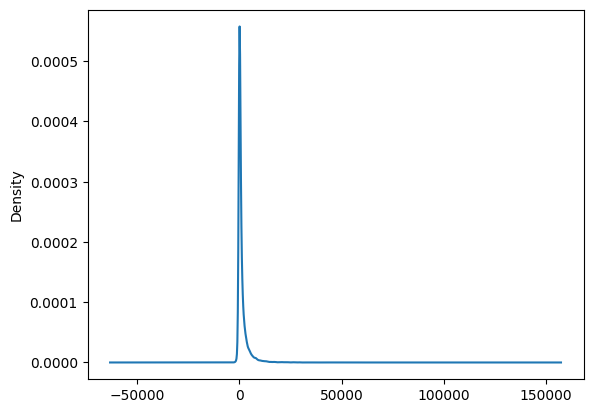

In [128]:
num['balance'].plot(kind='kde')

In [130]:
# num['balance'].skew()

In [131]:
# iqr
q1 = num['balance'].quantile(0.25)
q3 = num['balance'].quantile(0.75)

In [134]:
iqr = q3 - q1

In [142]:
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)

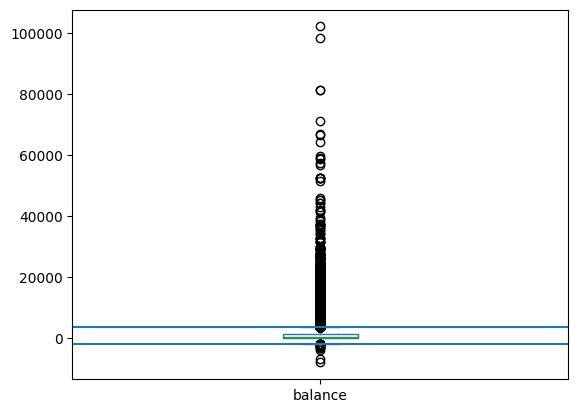

In [143]:
num['balance'].plot(kind='box')
plt.axhline(upper)
plt.axhline(lower)

In [161]:
# num.loc[num["balance"] > upper, "balance"] = upper
num.loc[num["balance"] < lower, "balance"] = lower

<Axes: >

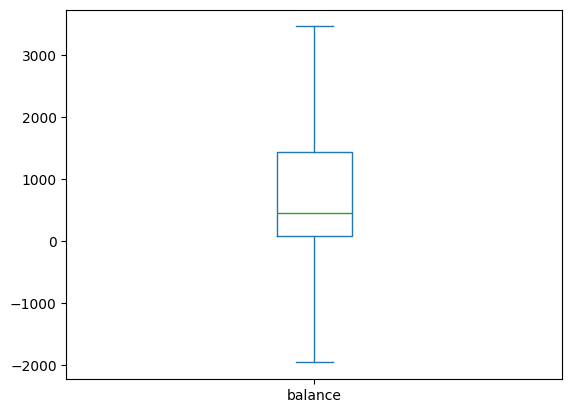

In [162]:
num['balance'].plot(kind='box')

In [166]:
from sklearn.preprocessing import PowerTransformer
pc = PowerTransformer()
num['balance'] = pc.fit_transform(num[['balance']])
num['balance'].skew()

np.float64(0.1744440851817276)

In [168]:
# num['balance'].plot(kind='kde')